In [136]:
import numpy as np
import random

# Colors and object types
COLORS = {
    "red": np.array([255, 0, 0]),
    "green": np.array([0, 255, 0]),
    "blue": np.array([0, 0, 255]),
    "purple": np.array([112, 39, 195]),
    "yellow": np.array([255, 255, 0]),
    "grey": np.array([100, 100, 100]),
}
OBJECT_TYPES = ["key", "ball", "box"]

# Function to create the maze
def create_maze(colors, object_types):
    # Select 4 random colors for initial keys
    initial_key_colors = random.sample(colors, 4)
    initial_keys = [("key", color) for color in initial_key_colors]

    # Create all possible pairs
    all_pairs = [(obj_type, color) for obj_type in object_types for color in colors]

    # Remove initial key pairs from all pairs
    remaining_pairs = [pair for pair in all_pairs if pair not in initial_keys]

    # Select 8 unique pairs from the remaining pairs
    selected_pairs = random.sample(remaining_pairs, 8)

    # Split into 4 sets of 2
    sets_of_pairs = [selected_pairs[i:i+2] for i in range(0, len(selected_pairs), 2)]

    return initial_keys, sets_of_pairs

# Create the maze
initial_keys, sets_of_pairs = create_maze(list(COLORS.keys()), OBJECT_TYPES)

from pprint import pprint
print("Initial Keys:")
pprint(initial_keys)
print("Sets of Pairs:")
pprint(sets_of_pairs)


Initial Keys:
[('key', 'yellow'), ('key', 'red'), ('key', 'grey'), ('key', 'purple')]
Sets of Pairs:
[[('box', 'yellow'), ('ball', 'green')],
 [('box', 'green'), ('key', 'blue')],
 [('box', 'blue'), ('ball', 'red')],
 [('ball', 'blue'), ('box', 'grey')]]


In [151]:
# this one has the test pairs overlap in shape/color with the keys/training pairs
def create_maze_overlap(colors, object_types):
    # Select 4 random colors for initial keys
    initial_key_colors = random.sample(colors, 4)
    initial_keys = [("key", color) for color in initial_key_colors]

    # Create all possible pairs
    all_pairs = [(obj_type, color) for obj_type in object_types for color in colors]

    # Remove initial key pairs from all pairs
    remaining_pairs = [pair for pair in all_pairs if pair not in initial_keys]

    # Select 4 unique pairs from the remaining pairs
    first_selected_pairs = random.sample(remaining_pairs, 4)

    # Observe types and colors from these pairs
    observed_types = set([pair[0] for pair in first_selected_pairs+initial_keys])
    observed_colors = set([pair[1] for pair in first_selected_pairs+initial_keys])

    # Create possible pairs from observed types and colors
    possible_new_pairs = [(obj_type, color) for obj_type in observed_types for color in observed_colors]

    # Remove already selected pairs
    new_pairs_candidates = [pair for pair in possible_new_pairs if pair not in first_selected_pairs and pair not in initial_keys]

    # Select 4 unique pairs from new pairs candidates
    second_selected_pairs = random.sample(new_pairs_candidates, 4)

    # Interleave first and second pairs to form 4 sets of 2
    sets_of_pairs = [(first_selected_pairs[i], second_selected_pairs[i]) for i in range(4)]

    return initial_keys, sets_of_pairs

# Create the maze
initial_keys, sets_of_pairs = create_maze_overlap(list(COLORS.keys()), OBJECT_TYPES)

from pprint import pprint
print("Initial Keys:")
pprint(initial_keys)
print("Sets of Pairs:")
pprint(sets_of_pairs)


Initial Keys:
[('key', 'grey'), ('key', 'purple'), ('key', 'green'), ('key', 'blue')]
Sets of Pairs:
[(('box', 'green'), ('ball', 'green')),
 (('ball', 'red'), ('ball', 'yellow')),
 (('key', 'yellow'), ('key', 'red')),
 (('box', 'grey'), ('ball', 'grey'))]


In [156]:
import json

def create_n_pairs_of_mazes(n, colors, object_types, create_fn=create_maze):
    pairs_of_mazes = []

    for _ in range(n):
        # Generate a pair of unique mazes
        init_keys, room_pairs = create_fn(colors, object_types)
        
        # Ensure uniqueness in the pair
        while init_keys in pairs_of_mazes or room_pairs in pairs_of_mazes or init_keys == room_pairs:
            init_keys, room_pairs = create_fn(colors, object_types)
        
        pairs_of_mazes.append({'keys': init_keys, 'pairs': room_pairs})

    return pairs_of_mazes

shared_att = False
if shared_att:
    json_file = 'maze_pairs.json'
    create_fn = create_maze
else:
    json_file = 'maze_pairs_shared.json'
    create_fn = create_maze_overlap

# Example usage
n = 5  # Number of pairs of mazes to generate
maze_pairs = create_n_pairs_of_mazes(n, list(COLORS.keys()), OBJECT_TYPES, create_fn=create_fn)
pprint(maze_pairs)
# Save to a JSON file


with open(json_file, 'w') as file:
    json.dump(maze_pairs, file, indent=4)

print(f'Maze pairs saved to {json_file}')


[{'keys': [('key', 'red'),
           ('key', 'yellow'),
           ('key', 'blue'),
           ('key', 'purple')],
  'pairs': [(('box', 'red'), ('key', 'green')),
            (('ball', 'green'), ('ball', 'red')),
            (('ball', 'blue'), ('box', 'yellow')),
            (('box', 'purple'), ('ball', 'purple'))]},
 {'keys': [('key', 'yellow'),
           ('key', 'green'),
           ('key', 'grey'),
           ('key', 'purple')],
  'pairs': [(('ball', 'purple'), ('box', 'grey')),
            (('ball', 'red'), ('box', 'yellow')),
            (('box', 'green'), ('ball', 'green')),
            (('box', 'purple'), ('ball', 'grey'))]},
 {'keys': [('key', 'yellow'),
           ('key', 'blue'),
           ('key', 'purple'),
           ('key', 'grey')],
  'pairs': [(('box', 'blue'), ('box', 'green')),
            (('box', 'yellow'), ('box', 'red')),
            (('key', 'red'), ('ball', 'blue')),
            (('ball', 'green'), ('ball', 'yellow'))]},
 {'keys': [('key', 'green'),
          

In [11]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
from projects.human_sf import key_room_v3 as key_room

json_file = 'maze_pairs.json'
with open(json_file, 'r') as file:
    mazes = json.load(file)

maze = mazes[0]
pprint(maze)
[p[0] for p in maze['pairs']]

{'keys': [['key', 'red'], ['key', 'blue'], ['key', 'yellow'], ['key', 'green']],
 'pairs': [[['ball', 'red'], ['box', 'yellow']],
           [['key', 'purple'], ['box', 'purple']],
           [['box', 'red'], ['box', 'green']],
           [['box', 'grey'], ['box', 'blue']]]}


[['ball', 'red'], ['key', 'purple'], ['box', 'red'], ['box', 'grey']]

In [177]:
maze = mazes[0]
pprint(maze)
import copy
maze_config = copy.deepcopy(maze)
maze_config['pairs'][0][1], maze_config['pairs'][1][1] = maze_config['pairs'][1][1], maze_config['pairs'][0][1]
pprint(maze_config)
# new_maze=dict(
#     keys=maze['keys'],
#     pairs=[
#         [maze['pairs'][0],
#     ]
# )
# new_maze['keys'] = 

# pairs = maze['pairs']
# pairs[0]

{'keys': [['key', 'red'], ['key', 'blue'], ['key', 'yellow'], ['key', 'green']],
 'pairs': [[['ball', 'red'], ['box', 'yellow']],
           [['key', 'purple'], ['box', 'purple']],
           [['box', 'red'], ['box', 'green']],
           [['box', 'grey'], ['box', 'blue']]]}
{'keys': [['key', 'red'], ['key', 'blue'], ['key', 'yellow'], ['key', 'green']],
 'pairs': [[['ball', 'red'], ['box', 'purple']],
           [['key', 'purple'], ['box', 'yellow']],
           [['box', 'red'], ['box', 'green']],
           [['box', 'grey'], ['box', 'blue']]]}


[['ball', 'red'], ['key', 'purple'], ['box', 'red'], ['box', 'grey'], ['box', 'yellow'], ['box', 'purple'], ['box', 'green'], ['box', 'blue']]


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.all_final_objects to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.all_final_objects` for environment variables or `env.get_wrapper_attr('all_final_objects')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


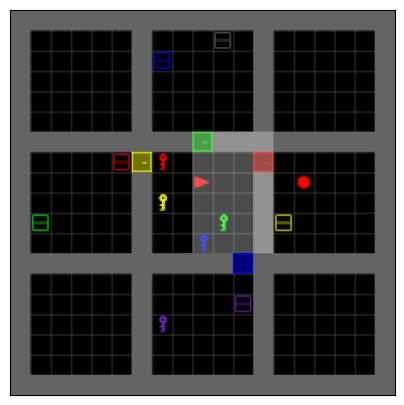

In [184]:
import matplotlib.pyplot as plt
import minigrid

def plot_image(image, figsize=(5,5)):
    fig, ax = plt.subplots(1,1, figsize=figsize)
    # ax.clear()  # Clear the previous plot
    # Remove ticks on both the x and y axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Optionally, you can also remove the tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(image)

env = key_room.KeyRoom(
    maze_config=mazes[0],
    training=False,
    swap_episodes=3,
    color_rooms=False,
    flat_task=False)
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)

print(env.all_final_objects)
for _ in range(1):
    obs, info = env.reset()
    plot_image(obs['image'])  # Assuming image has shape (C, H, W)

In [186]:
['ball', 'red'] in [['ball', 'red'], ['key', 'purple'], ['box', 'red'], ['box', 'grey'], ['box', 'yellow'], ['box', 'purple'], ['box', 'green'], ['box', 'blue']]

True

In [174]:
print(env.task.make_task_array())
env.task.print_task_array()


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
['purple, ball = 0.0', 'purple, room = 0.0', 'purple, box = 0.0', 'purple, key = 0.0']
['grey, ball = 0.0', 'grey, room = 0.0', 'grey, box = 0.0', 'grey, key = 0.0']
['green, ball = 0.0', 'green, room = 0.0', 'green, box = 1.0', 'green, key = 0.0']
['start, ball = 0.0', 'start, room = 0.0', 'start, box = 0.0', 'start, key = 0.0']
['red, ball = 0.0', 'red, room = 0.0', 'red, box = 0.0', 'red, key = 0.0']
['blue, ball = 0.0', 'blue, room = 0.0', 'blue, box = 0.0', 'blue, key = 0.0']
['yellow, ball = 0.0', 'yellow, room = 0.0', 'yellow, box = 0.0', 'yellow, key = 0.0']


In [82]:
class TaskRep:
    def __init__(
        self,
        shapes,
        colors,
        target,
        target_room_color,
        colors_to_room,
        delta_state_features: bool = True,
    ):
        self.shapes = shapes
        self.colors = colors
        self.target = target
        self.target_room_color = target_room_color
        self.delta_state_features = delta_state_features
        self.room_to_color = {room: color for color, room in color_to_room.items()}

        self.task_array = self.make_task_array()
        self.feature_counts = empty_array()

    def empty_array(self):
        # Initialize the array with zeros
        return np.zeros((len(self.colors), len(self.shapes)))

    def make_task_array(self):
        # Initialize the array with zeros
        array = np.zeros((len(self.colors), len(self.shapes)))

        # Set the target shape and color to 1
        target_color_idx = self.colors.index(self.target[1])
        target_shape_idx = self.shapes.index(self.target[0])
        array[target_color_idx, target_shape_idx] = 1

        # Set the room and key for the target room color to 0.5 and 0.1 respectively
        target_room_color_idx = self.colors.index(self.target_room_color)
        room_shape_idx = self.shapes.index('room')
        key_shape_idx = self.shapes.index('key')
        array[target_room_color_idx, room_shape_idx] = 0.5
        array[target_room_color_idx, key_shape_idx] = 0.1

        return array

    def get_carrying(self, env):
        if env.carrying:
            color, shape = env.carrying.color, env.carrying.type
            return color, shape
        return None, None

    def current_room(self, env):
        agent_room = env.room_from_pos(*env.agent_pos)
        return self.room_to_color[agent_room]

    def current_state(env):
        # Reset the state array to all zeros
        state_array = self.empty_array()

        # Check if the agent is carrying something
        carrying_color, carrying_shape = self.get_carrying(env)
        if carrying_color and carrying_shape:
            color_idx = self.colors.index(carrying_color)
            shape_idx = self.shapes.index(carrying_shape)
            state_array[color_idx, shape_idx] = 1

        # Check the color of the current room
        current_room_color = self.current_room(env)
        if current_room_color:
            room_color_idx = self.colors.index(current_room_color)
            room_shape_idx = self.shapes.index('room')
            state_array[room_color_idx, room_shape_idx] = 1

        return state_array

    def step(self, env):
        current_state_features = self.current_state(env)
        self.feature_counts += current_state_features
        first = (self.feature_counts == 1).astype(np.float32)

        difference = (elf.feature_counts - self.prior_feature_counts).astype(np.float32)
        state_features = first*difference

        return state_features



# Example usage
shapes = ['room', 'key', 'box', 'ball']
colors = ['start', 'red", "green", "blue']

target = ['box', 'blue']
target_room_color = 'red'

maze_rep = TaskRep(shapes, colors, target, target_room_color)
print(maze_rep.get_array())

TypeError: __init__() missing 1 required positional argument: 'colors_to_room'